In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn import linear_model

## 3.6.2 線形単回帰

### scikit-learn

### データの読み込み

In [41]:
boston = load_boston()
print(boston.keys())
print(boston.feature_names)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [90]:
X = boston.data
y = boston.target
X.shape, X[:, 0].shape, y.shape

((506, 13), (506,), (506,))

### モデル定義、フィット

In [97]:
model = linear_model.LinearRegression()
# 予測変数: lstat, 応答変数: medv
model.fit(X[:, 12].reshape(-1, 1), y.reshape(-1, 1))

LinearRegression()

### メトリクス

In [94]:
# 係数、切片、R2スコア
model.coef_, model.intercept_, model.score(X[:, 12].reshape(-1, 1), y.reshape(-1, 1))

(array([[-0.95004935]]), array([34.55384088]), 0.5441462975864799)

In [60]:
from sklearn.metrics import mean_squared_error, explained_variance_score, r2_score

In [67]:
y_pred = model.predict(X[:, 12].reshape(-1, 1))
explained_variance_score(y, y_pred)

0.5441462975864798

In [65]:
mean_squared_error(y, y_pred)

38.48296722989414

### StatsModels

In [70]:
import statsmodels.api as sm

In [95]:
model = sm.OLS(y, sm.add_constant(X[:, 12].reshape(-1, 1)))
results = model.fit()

In [96]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Sun, 06 Jun 2021   Prob (F-statistic):           5.08e-88
Time:                        06:48:21   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.000      33.448      35.659
x1            -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### プロット

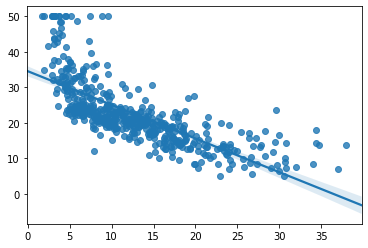

In [98]:
sns.regplot(X[:, 12].reshape(-1, 1), y)

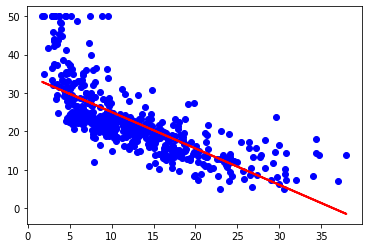

In [102]:
plt.scatter(X[:, 12].reshape(-1, 1), y, color='blue')
plt.plot(X[:, 12].reshape(-1, 1), model.predict(X[:, 12].reshape(-1, 1)), color='red', linewidth= 2) 


## 3.6.3 線形重回帰

In [111]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['TARGET'] = boston.target
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [113]:
X = df[['LSTAT', 'AGE']]
y = df['TARGET']

### scikit-learn

In [114]:
model = linear_model.LinearRegression()

In [115]:
model.fit(X, y)

LinearRegression()

In [118]:
model.coef_, model.intercept_, model.score(X, y)

(array([-1.03206856,  0.03454434]), 33.2227605317929, 0.5512689379421003)

In [119]:
explained_variance_score(y, model.predict(X))

0.5512689379421003

In [120]:
mean_squared_error(y, model.predict(X))

37.88167709241267

### StatsModels

In [125]:
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()

results.summary()

## 3.6.4 交互作用項

In [127]:
def make_interaction(X):
    return X['LSTAT'] * X['AGE']    

In [131]:
X['I_LSTAT_AGE'] = X.apply(make_interaction, axis=1)

/home/nariaki/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [133]:
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 TARGET   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Sun, 06 Jun 2021   Prob (F-statistic):           4.86e-88
Time:                        07:15:07   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          36.0885      1.470     24.553      0.000      33.201      38.976
LSTAT          -1.3921      0.167     -8.313      0.000      -1.721      -1.063
AGE            -0.0007      0.020     -0.036      0.971      -0.040       0.038
I_LSTAT_AGE     0.0042      0.002      2.244      0.025       0.001       0.008
==============================================================================
Omnibus:                      135.601   Durbin-Watson:                   0.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              296.955
Skew:                           1.417   Prob(JB):                     3.29e-65
Kurtosis:                       5.461   Cond. No.                     6.88e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [134]:
from sklearn.preprocessing import PolynomialFeatures as PF

In [162]:
pf = PF(degree=2, include_bias = False)

In [163]:
poly_X = pf.fit_transform(np.array(X['LSTAT']).reshape(-1, 1))

In [165]:
model = sm.OLS(y, sm.add_constant(poly_X))
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 TARGET   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Sun, 06 Jun 2021   Prob (F-statistic):          1.56e-112
Time:                        07:39:39   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         42.8620      0.872     49.149      0.000      41.149      44.575
x1            -2.3328      0.124    -18.843      0.000      -2.576      -2.090
x2             0.0435      0.004     11.628      0.000       0.036       0.051
==============================================================================
Omnibus:                      107.006   Durbin-Watson:                   0.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.388
Skew:                           1.128   Prob(JB):                     2.55e-50
Kurtosis:                       5.397   Cond. No.                     1.13e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""